#### Повторение кода из лекций курса https://stepik.org/course/4852 и решение задач

## 1. Введение

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from scipy.stats import entropy

In [5]:
from sklearn import tree

In [6]:
from sklearn.tree import plot_tree
from sklearn.model_selection import  train_test_split

In [7]:
from sklearn import set_config
set_config(print_changed_only=False)

In [8]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [9]:
df.shape

(891, 12)

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df[(df.Pclass > 1) & (df.Survived == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
df2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
a = df2[df2.lunch == 'free/reduced'].shape[0]
ans = a / df2.shape[0]
ans

0.355

In [17]:
(df2.lunch == 'free/reduced').mean()

0.355

In [18]:
df2.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

<Axes: >

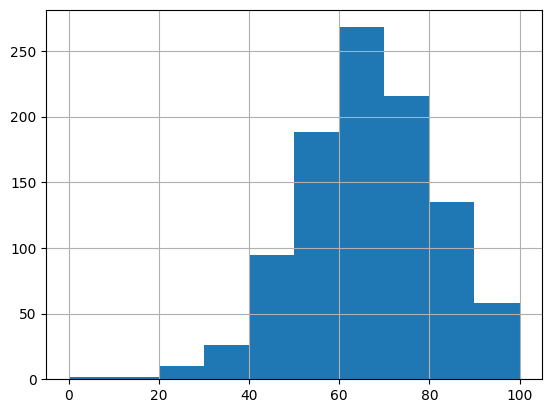

In [19]:
df2['math score'].hist()

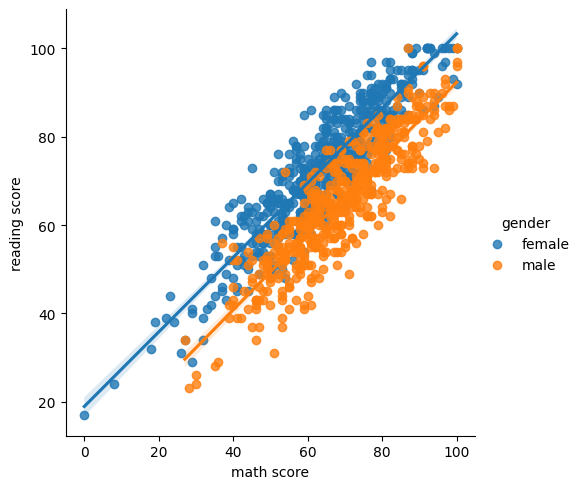

In [20]:
sns.lmplot(x='math score', y='reading score', hue='gender', data=df2)

In [21]:
df2.loc[df2.lunch == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [22]:
df2.loc[df2.lunch == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [23]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [24]:
df_dota.groupby('legs').count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [25]:
df_dota['legs'].value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [26]:
df_dota.groupby('legs').size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [27]:
df_dota.groupby(['attack_type', 'primary_attr']).describe()

Unnamed: 0                                           \
                              count       mean        std   min    25%   50%   
attack_type primary_attr                                                       
Melee       agi                19.0  61.315789  38.233279   0.0  34.50  65.0   
            int                 2.0  67.500000  20.506097  53.0  60.25  67.5   
            str                35.0  62.657143  34.265351   1.0  31.50  69.0   
Ranged      agi                18.0  46.111111  32.737618   5.0  15.25  44.5   
            int                40.0  55.225000  32.472069   2.0  28.75  50.5   
            str                 3.0  84.666667  25.774665  57.0  73.00  89.0   

                                          id             ...                 \
                            75%    max count       mean  ...     75%    max   
attack_type primary_attr                                 ...                  
Melee       agi           89.00  114.0  19.0  63.315789  ...   91.00  120.0   
            int           74.75   82.0   2.0  69.500000  ...   76.75   84.0   
            str           95.50  116.0  35.0  64.771429  ...   97.50  129.0   
Ranged      agi           67.75  111.0  18.0  47.777778  ...   69.75  113.0   
            int           78.75  115.0  40.0  57.275000  ...   80.75  121.0   
            str           98.50  108.0   3.0  86.666667  ...  100.50  110.0   

                          legs                                               
                         count      mean       std  min  25%  50%  75%  max  
attack_type primary_attr                                                     
Melee       agi           19.0  2.315789  1.796683  0.0  2.0  2.0  2.0  8.0  
            int            2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
            str           35.0  2.171429  0.890661  0.0  2.0  2.0  2.0  6.0  
Ranged      agi           18.0  1.444444  1.149026  0.0  0.0  2.0  2.0  4.0  
            int           40.0  2.250000  0.926809  0.0  2.0  2.0  2.0  6.0  
            str            3.0  1.333333  1.154701  0.0  1.0  2.0  2.0  2.0  

[6 rows x 24 columns]

In [28]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
df_salary.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [29]:
df_salary.groupby(['Type', 'Executor']).aggregate({'Salary': 'mean'})

Salary
Type Executor            
A    Loopa      58.000000
     Pupa      160.833333
B    Loopa     145.166667
     Pupa       77.000000
C    Loopa     154.333333
     Pupa       74.500000
D    Loopa     137.714286
     Pupa      146.500000
E    Loopa     164.000000
     Pupa      131.200000
F    Loopa     238.000000
     Pupa      136.250000

In [30]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [31]:
concentrations.groupby('group')['sucrose'].max() - concentrations.groupby('group')['sucrose'].min() 

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64

In [32]:
salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
salary.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


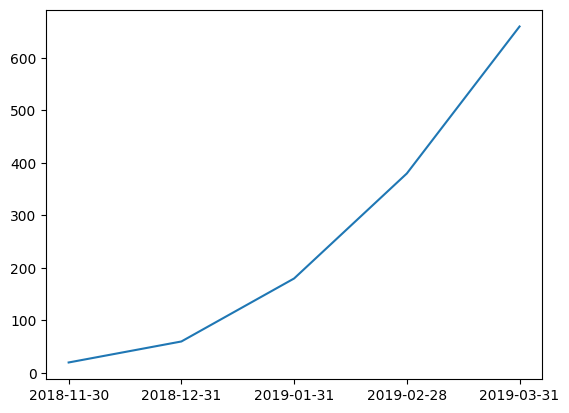

In [33]:
plt.plot(salary.index, salary.income)

C:\Users\KDK\AppData\Local\Temp\ipykernel_7840\2111926114.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x=salary.index,y=salary.income,hue='income',palette=sns.color_palette("hls",10),data=salary,


<Axes: ylabel='income'>

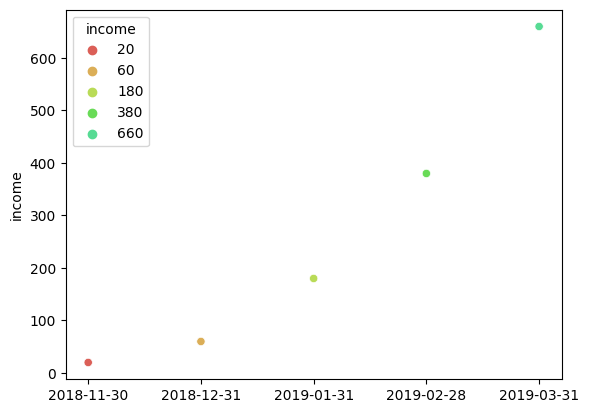

In [34]:
sns.scatterplot(x=salary.index,y=salary.income,hue='income',palette=sns.color_palette("hls",10),data=salary,
               legend="full")

In [35]:
salary

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


##### Задача 1.
<br>Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями

In [36]:
df123 = pd.read_csv(r'C:\Users\KDK\DS_education\Stepik\dataset_209770_6 (1).txt', sep=' ')
df123.head()

,x,y
0,504.076298,195.530355
1,1508.447735,286.050917
2,1094.389724,580.122593
3,1203.838418,684.653974
4,507.837220,191.916221


<Axes: xlabel='x', ylabel='y'>

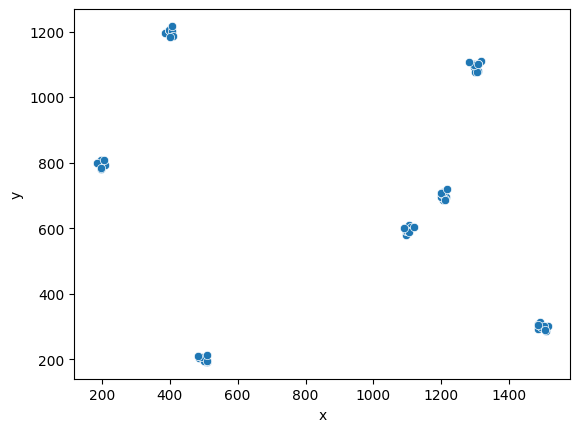

In [37]:
sns.scatterplot(x='x',y='y',data=df123)

Ответ: 7 кластеров

##### Задача 2. 

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным

In [38]:
genom = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
genom.head()


,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [39]:
genom.dtypes

species0    float64
species1    float64
species2    float64
species3    float64
species4    float64
dtype: object

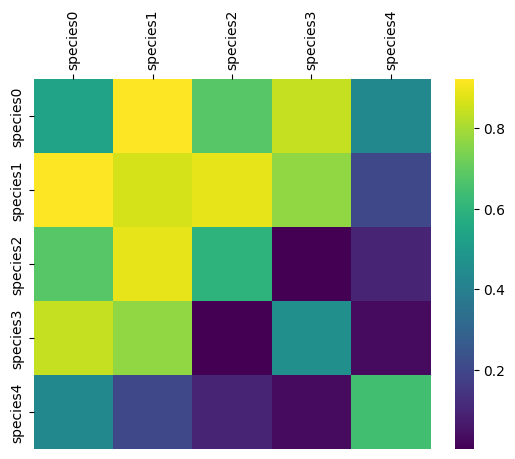

In [40]:
g = sns.heatmap(genom, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

##### Задача 3. 

Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [41]:
df_dota2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)
df_dota2.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [42]:
df_dota2['len_roles'] = df_dota2.aggregate({'roles': lambda x: len(x.split(','))})
df_dota2.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles,len_roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


In [43]:
df_dota2['len_roles'].value_counts().sort_values(ascending=False)

4    38
5    33
3    28
2     9
6     8
1     1
Name: len_roles, dtype: int64

Ответ: 4 роли

In [44]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: ylabel='Density'>

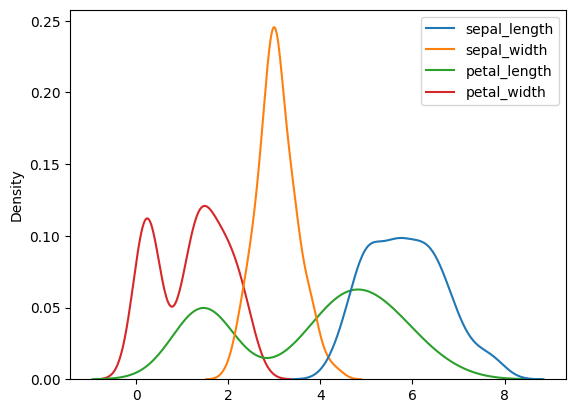

In [45]:
sns.kdeplot(data=iris)

<Axes: ylabel='petal_length'>

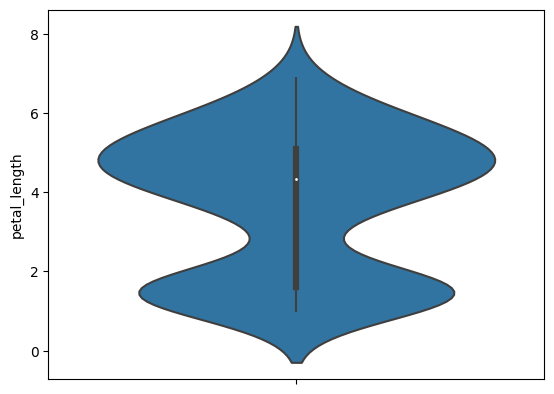

In [46]:
sns.violinplot(y=iris["petal_length"])

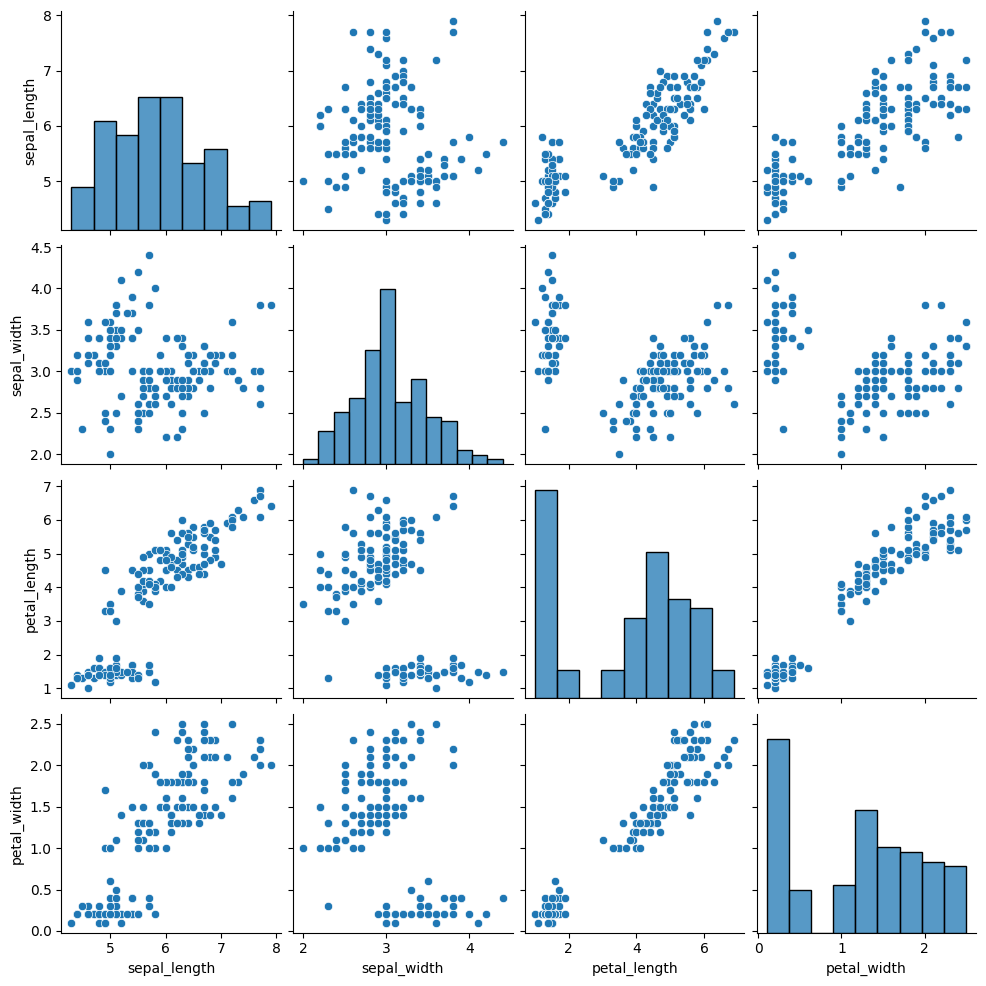

In [47]:
sns.pairplot(iris)

Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:


    type value
    A    10

    A    14

    B    12

    B    23

In [48]:
my_data = pd.DataFrame({'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 7]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,7


В dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

In [49]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [50]:
subset_2 = my_stat.drop([1, 5]).iloc[:, [1, 3]]
subset_2

,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [51]:
subset_1 = my_stat.iloc[:10, [0, 2]]
temp = my_stat.drop([1, 5])
subset_2 = temp.iloc[:, [1, 3]]

In [52]:
subset_2

,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [53]:
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


В переменную subset_3 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_4  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

In [54]:
subset_3 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_4 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
subset_3

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [55]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
df.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [56]:
df['session_value'].fillna(value=0, inplace=True)
df.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [57]:
df.loc[df['n_users'] < 0]['n_users'] = df['n_users'].median()
df.head()

C:\Users\KDK\AppData\Local\Temp\ipykernel_7840\806405460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['n_users'] < 0]['n_users'] = df['n_users'].median()


,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

In [58]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [59]:
my_stat['session_value'].fillna(0, inplace=True)
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [60]:
median_value = my_stat['n_users'].loc[my_stat['n_users'] >= 0].median()
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = median_value
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [61]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}) \
                        .rename(columns={'session_value': 'mean_session_value'})
mean_session_value_data.head()

,group,mean_session_value
0,A,1.0
1,B,1.0


## 2  Решающие деревья (Decision Trees)

In [62]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [63]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [64]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [65]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [66]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

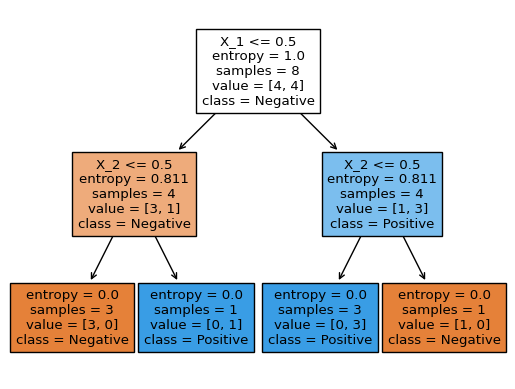

In [67]:

plot_tree(clf, feature_names=list(X), class_names=['Negative', 'Positive'], filled=True); 

<b>Энтропия</b> - мера беспорядка. Чем выше энтропия, тем хуже получается разделить классы.

В бинарном классификации энтропия находится от 0 до 1.

0 - Когда классы можно однозначно разделить

1 - Когда полный хаус и нет представления как разделить классы

S0 -  полная энтропия (может обозначаться E(S)),

S1,S2 - условная энтропия, для конкретного условия разделения выборки

Формула расчета энтропии Шеннона для системы с N возможными состояниями:

\begin{align*}
E(S) = -\sum_{i=1}^{N} p_ilog_2p_i
\end{align*}

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии


Для случая бинарной классификации

\begin{align*}
E(S) = -p *log_2(p) - (1 - p) * log_2(1 - p)
\end{align*}

где p - отношение количества элементов 1 класса к сумме всех элементов обоих классов

Поскольку энтропия это по сути степень хаоса (или неопределенности) в системе, то уменьшение энтропии называют приростом информации.

Формула прироста информации:
\begin{align*}
IG(Q) = S_o - \sum_{i=1}^{q} \frac{N_i}{N} S_i
\end{align*}

In [68]:
def ent(data):
    return entropy(data['Вид'].value_counts() / len(data), base=2)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [69]:
#посчитать энтропию в группе, где переменная равна 0 и в группе, где переменная равна 1
print('Шерстист на 0: ', round(ent(df[df['Шерстист'] == 0]), 2))
print('Шерстист на 1: ', round(ent(df[df['Шерстист'] == 1]), 2))
print('Гавкает на 0: ', round(ent(df[df['Гавкает'] == 0]), 2))
print('Гавкает на 1: ', round(ent(df[df['Гавкает'] == 1]), 2))
print('Лазает по деревьям на 0: ', round(ent(df[df['Лазает по деревьям'] == 0]), 2))
print('Лазает по деревьям на 1: ', round(ent(df[df['Лазает по деревьям'] == 1]), 2))

Шерстист на 0:  0.0
Шерстист на 1:  0.99
Гавкает на 0:  0.0
Гавкает на 1:  0.72
Лазает по деревьям на 0:  0.0
Лазает по деревьям на 1:  0.0


In [70]:
#посчитать Information gain по признакам
def information_gain(df, label):
    info_gain = ent(df) \
                - ent(df[df[label] == 1]) * df[df[label] == 1][label].sum() / len(df) \
                - ent(df[df[label] == 0]) * df[df[label] == 0][label].sum() / len(df)
    return round(info_gain, 2)

In [71]:
information_gain(df, 'Шерстист')

0.08

In [72]:
information_gain(df, 'Гавкает')

0.61

In [73]:
information_gain(df, 'Лазает по деревьям')

0.97

### Titanic Machine Learning From Disaster

In [74]:
# # from IPython.display import SVG
# # from graphviz import Source
# # from IPython.display import display
# from IPython.display import HTML
# style = "<style>svg{width:70% !important;height:100% !important;}</style>"
# HTML(style)

In [75]:
titanic_data = pd.read_csv('Titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# проверяем в каких колонках есть пропцщенные значения и много ли их
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

In [78]:
#заполняем пропуски в Age медианными значениями в зависимости от пола, класса и выживаемости
med = X.groupby(['Sex', 'Pclass', 'Survived'], as_index=False)['Age'].transform('median')
X = X.fillna({'Age': med.Age})

In [79]:
X = X.drop('Survived', axis=1)

In [80]:
X = pd.get_dummies(X) #конвертирует строковые (классовые) переменные в бинарные (например колонка Sex разбивается на две: Sex_male и Sex_female, заполненные 0 и 1)

In [81]:
clf = tree.DecisionTreeClassifier()

In [82]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

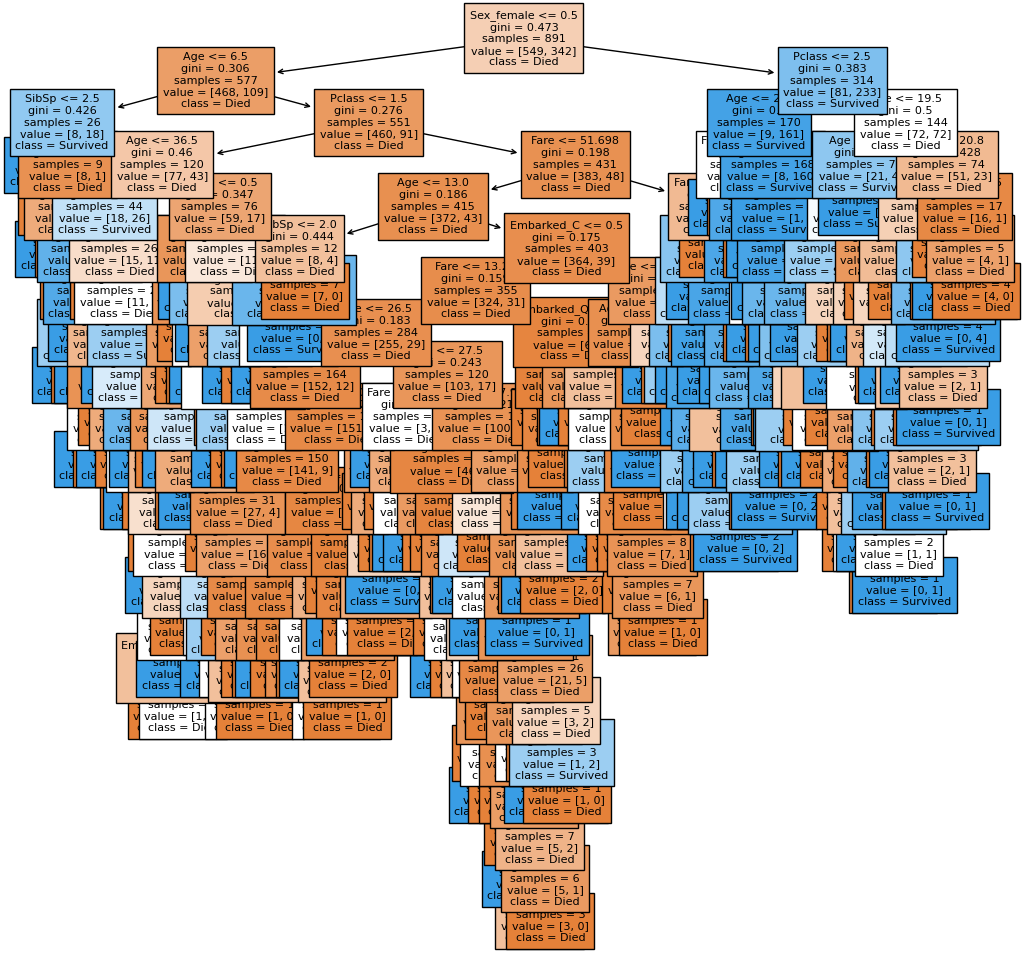

In [83]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, feature_names=list(X), filled=True, fontsize=8, class_names=['Died', 'Survived'])
plt.show()

In [84]:
# graph = Source(tree.export_graphviz(clf, out_file=None
#               , feature_names = list(X), class_names=['Died', 'Survived']
#               , filled=True))

# display(SVG(graph.pipe(format='svg')))

In [85]:
# разобьем выборку на test и train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
# обучим модель на train data без ограничения глубины дерева
clf.fit(X_train, y_train)

# процент правильных предсказаний на train (почти 100%!)
clf.score(X_train, y_train)

0.9798657718120806

In [87]:
# процент правильных предсказаний на test (низкий!)
clf.score(X_test, y_test)

0.7830508474576271

In [88]:
# ограничим глубину дерева - max_depth=5
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [89]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train) 

0.8657718120805369

In [90]:
clf.score(X_test, y_test) # качество предсказания на train понизилось, однако качество предсказания на test повысилось

0.8406779661016949

In [91]:
# попробуем max_depth=3
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [92]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train) 

0.8271812080536913

In [93]:
clf.score(X_test, y_test) # качество понизилось и на train и на test

0.8203389830508474

попробуем подобрать оптимальную глубину дерева "вручную"

In [94]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [95]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.808725,0.776271
0,3,0.827181,0.820339
0,4,0.845638,0.837288
0,5,0.865772,0.840678


In [96]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')

In [97]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.808725
2,3,train_score,0.827181
3,4,train_score,0.845638
4,5,train_score,0.865772


<Axes: xlabel='max_depth', ylabel='score'>

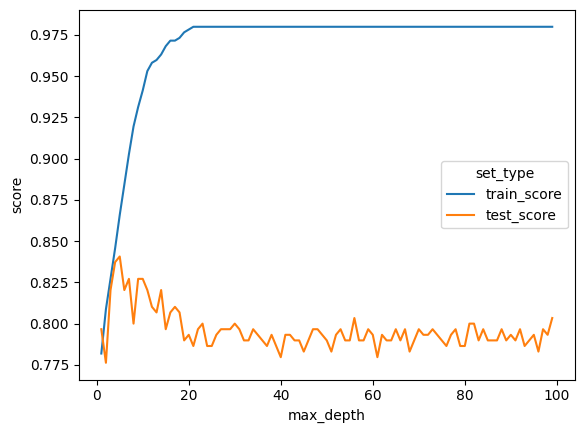

In [98]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

Чтобы избежать переобучения (overfitting) модели на train данных - вводят кросс-валидацию (разбивают train на несколько частей (например, на 5: тогда модель обучается на 4 частях, а на 5й тестируется), и усредняют score по 5 прогонам через train (тестовой частью каждый раз выступает новый кусок))

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [101]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8003781512605042

In [102]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [103]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type',
                           value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

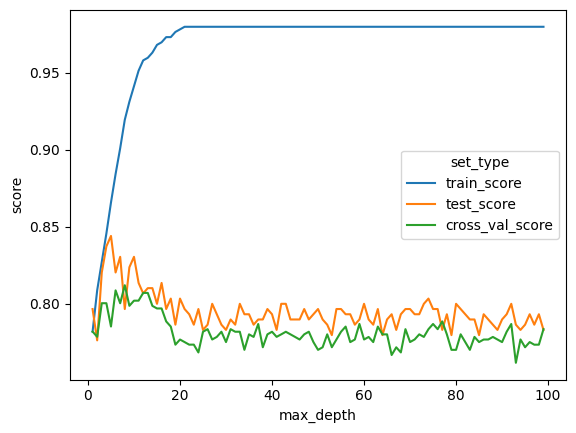

In [104]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [105]:
scores_data_long[scores_data_long['set_type'] == 'cross_val_score'].sort_values(by=['score'], ascending=False)
# лучший score получается при глубине дерева 6

,max_depth,set_type,score
205,8,cross_val_score,0.812073
203,6,cross_val_score,0.808725
209,12,cross_val_score,0.807087
210,13,cross_val_score,0.807059
208,11,cross_val_score,0.802045
...,...,...,...
247,50,cross_val_score,0.770098
265,68,cross_val_score,0.768431
221,24,cross_val_score,0.768417
263,66,cross_val_score,0.766751


In [106]:
# проверим модель с max_depth = 6 на тестовых данных X_test, y_test
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8135593220338982

Задание. 
<br>Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева

In [107]:
train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [108]:
test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
test_data.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [109]:
train_data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [110]:
X_train = train_data.drop(['species'], axis=1)
y_train = train_data['species']

In [111]:
X_test = test_data.drop(['species'], axis=1)
y_test = test_data['species']

In [112]:
np.random.seed(0)
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
   # mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                   # 'cross_val_score': [mean_cross_val_score]
                                   })
    scores_data = pd.concat([scores_data, temp_score_data])

In [113]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'],
                           value_vars=['train_score', 
                                       'test_score', 
                                      # 'cross_val_score'
                                      ],
                           var_name='set_type',
                           value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

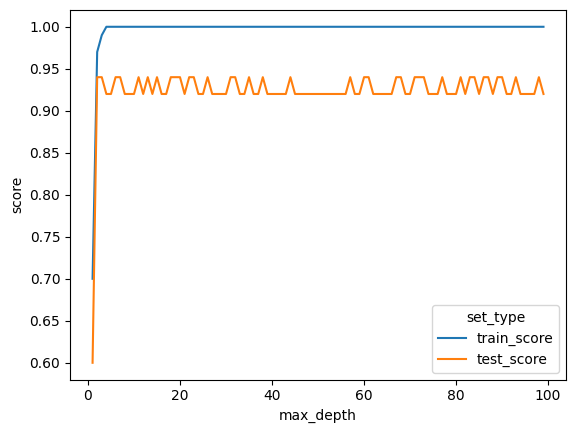

In [114]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

**Задание 2.**
<br>Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте

In [115]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [116]:
df.shape

(1000, 6)

In [117]:
df.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [118]:
X_train = df.drop('Вид', axis=1)
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [119]:
y_train = df['Вид']

In [120]:
np.random.seed(0)
max_depth_values = range(1, 30)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'cross_val_score': [mean_cross_val_score]
                                   })
    scores_data = pd.concat([scores_data, temp_score_data])
    
    

In [121]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'],
                           value_vars=['train_score', 
                                       'cross_val_score'
                                      ],
                           var_name='set_type',
                           value_name='score')

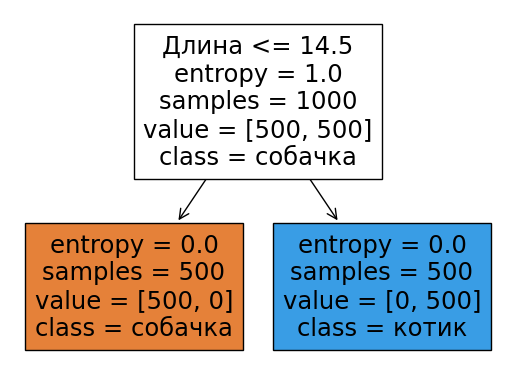

In [122]:
#plt.figure(figsize=(6,6))  # set plot size (denoted in inches)
tree.plot_tree(clf, feature_names=list(X_train), filled=True, class_names=list(y_train.unique()))
plt.show()

In [123]:
train_set = pd.read_json(r'C:\Users\KDK\DS_education\Stepik\dataset_209691_15.txt')
train_set.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,30,36.0,1,1,0
1,28,33.6,1,1,0
2,33,39.6,1,1,0
3,34,40.8,1,1,0
4,21,25.2,1,1,0


In [124]:
res = clf.predict(train_set)

In [125]:
unique, counts = np.unique(res, return_counts=True)
dict(zip(unique, counts))

# другой способ:
pd.Series(res).value_counts()

котик      57
собачка    43
dtype: int64

### Метрики качества модели

Confusion matrix (матрица ошибок)

|  |$y = 1$|	$y = 0$|
| --- | --- | --- |
|$\hat y = 1$|	True Positive (TP)  |False Positive (FP) <br>**ошибка первого рода**|
|$\hat y = 0$|	False Negative (FN) <br>**ошибка второго рода**|True Negative (TN)|

 $\hat y$ — это ответ алгоритма на объекте, а $y$ — истинная метка класса на этом объекте.

**Accuracy** - доля правильных ответов алгоритма (часто бесполезная метрика, если классы не сбалансированы, т.е. в разных классах сильно отличающееся количество наблюдений)


\begin{align*}
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align*}


**Precision** - точность - доля объектов, названных классификатором положительными и при этом действительно являющимися положительными


\begin{align*}
precision = \frac{TP}{TP + FP}
\end{align*}


**Recall** - полнота - показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

\begin{align*}
recall = \frac{TP}{TP + FN}
\end{align*}

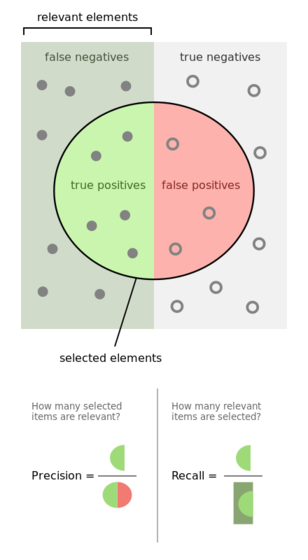

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall:


\begin{align*}
\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}
\end{align*}

$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$)

<br>F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

<br>В sklearn есть удобная функция _metrics.classificationreport, возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.

**Подбор параметров**

вернемся к Titanic задаче

In [126]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

med = X.groupby(['Sex', 'Pclass', 'Survived'], as_index=False)['Age'].transform('median')
X = X.fillna({'Age': med.Age})
X = X.drop('Survived', axis=1)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [127]:
X_train.shape 

(596, 10)

In [128]:
X_test.shape

(295, 10)

In [129]:
y_train.shape

(596,)

In [130]:
y_test.shape

(295,)

In [131]:
from sklearn.model_selection import GridSearchCV

Одним из способов найти более или менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
<br>Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. 
<br>После этого в аттрибуте .best_estimator_ хранится модель с лучшими параметрами.
<br>Это применимо не только к деревьям, но и к другим моделям sklearn.

In [132]:
clf = tree.DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

grid_search_cv_clf = GridSearchCV(clf, param_grid=parameters, cv=5)

In [133]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [134]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [135]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [136]:
best_clf.score(X_test, y_test) #accuracy

0.8067796610169492

In [137]:
X_test.shape

(295, 10)

In [138]:
# precision

from sklearn.metrics import precision_score, recall_score

y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.7647058823529411

In [139]:
# recall

recall_score(y_test, y_pred)

0.7583333333333333

In [140]:
titanic_test = pd.read_csv(r'C:\Users\KDK\DS_education\Stepik\Titanic_test.csv')
titanic_test.head()
X_titanic_test = titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [141]:
X_titanic_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [142]:
X_titanic_test.shape

(418, 7)

In [143]:
#заполняем пропуски в Age медианными значениями в зависимости от пола, класса и выживаемости
med = X_titanic_test.groupby(['Sex', 'Pclass'], as_index=False)['Age'].transform('median')
X_titanic_test = X_titanic_test.fillna({'Age': med.Age})
X_titanic_test = pd.get_dummies(X_titanic_test)
X_titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [144]:
X_titanic_test = X_titanic_test.fillna(X_test['Fare'].median())
X_titanic_test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [145]:
X_titanic_test.shape

(418, 10)

In [146]:
submission = pd.Series(best_clf.predict(X_titanic_test), name='Survived')
result = pd.concat([titanic_test['PassengerId'], submission], axis=1)



In [147]:
result.shape

(418, 2)

In [148]:
result.to_csv(r'C:\Users\KDK\DS_education\Stepik\submisson.csv', index=False)

продолжим исследование precision и recall

<Axes: >

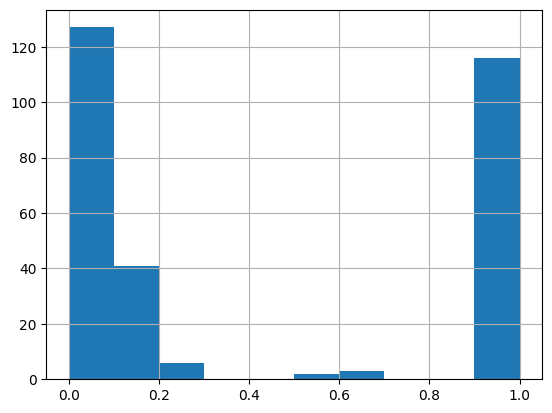

In [149]:
y_predicted_prob = best_clf.predict_proba(X_test) # выдает не 1 или 0 (отнесение к классу), а вероятность отнесения к классу. По умолчанию установлен порог отнесения 0.5
pd.Series(y_predicted_prob[:, 1]).hist() # распределение предсказанных деревом вероятностей отнесения к классу "survived"

Если изменить порог, то изменятся precision и recall

In [150]:
X_test.shape

(295, 10)

In [151]:
# проверим для 0.8
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

precision_score(y_test, y_pred)

0.7844827586206896

In [152]:
recall_score(y_test, y_pred)

0.7583333333333333

In [153]:
# проверим для 0.2
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)

precision_score(y_test, y_pred)

0.7322834645669292

In [154]:
recall_score(y_test, y_pred)

0.775

Для поиска оптимального порога используют ROC - кривую

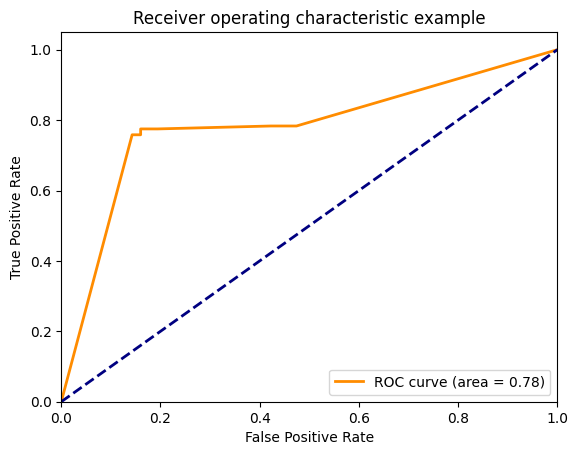

In [155]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc = auc(fpr, tpr)
lw = 2 # line width
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

1) ROC-кривая позволяет отобразить на одном графике результаты большого числа матриц ошибок (confusion matrix) в зависимости от различного уровня порога отсечения бинарных классов (хотя дерево решений может использоваться и для небинарной классификации)
<br>

2) ось y - TPR(=Recall=Полнота или Чувствительность=TP/(TP+FN)), на ось x может быть выведен или FPR=1-Specificity=1-TN/(TN+FP), или Precision=TP/(TP+FP) - тот или иной показатель используется в зависимости от отсутствия или наличия дисбаланса классов.
<br>

3) AUC = area under the curve = интегральный показатель площади под кривой [0;1], AUC=0,5 - дерево не лучше случайного распределения

Задание

Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

 

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

In [156]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [157]:
X = data.drop('num', axis=1)
y = data['num']

In [158]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

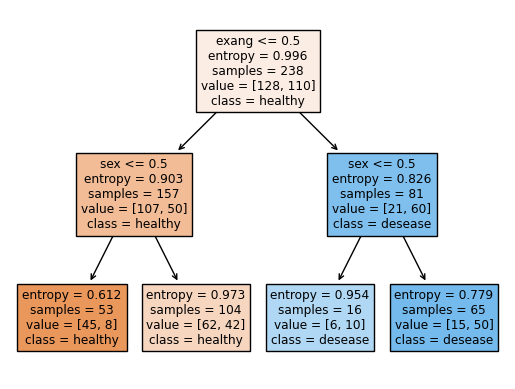

In [159]:
tree.plot_tree(clf, feature_names=list(X), filled=True, class_names=['healthy', 'desease'])
plt.show()

In [160]:
# IG = 0.996 - (n0*E0 + n1*E1)/N
# n0 - чило сэмплов слева, n1 - число сэмплов справа, E0 - энтропия слева, Е1 - энтропия справа. N = n0+n1 

IG = 0.996 - (157*0.903 + 81*0.826)/238
IG

0.11920588235294105

In [161]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier()
search = GridSearchCV(clf, param_grid={'max_depth': range(1, 11), 
                            'min_samples_split': range(2, 11), 
                            'min_samples_leaf': range(1, 11)})
search.fit(X, y)
best_tree = search.best_estimator_

Обучим модель с помощью Random Forest (параметры выбрали "с потолка")

In [162]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [163]:
best_clf = grid_search_cv_clf.best_estimator_

In [164]:
best_clf.score(X_test, y_test)

0.823728813559322

In [165]:
# средневзвешенная "важность" фичей (как часто тот или иной признак использовался для сплита, с учетом того какой IG при этом был получен)
feature_importances = best_clf.feature_importances_

In [166]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})

In [167]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.391482
4,Fare,0.143510
0,Pclass,0.126419
1,Age,0.124438
5,Sex_female,0.113925
3,Parch,0.027700
7,Embarked_C,0.026663
2,SibSp,0.025325
9,Embarked_S,0.011334
8,Embarked_Q,0.009203


______________________
Задание

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).

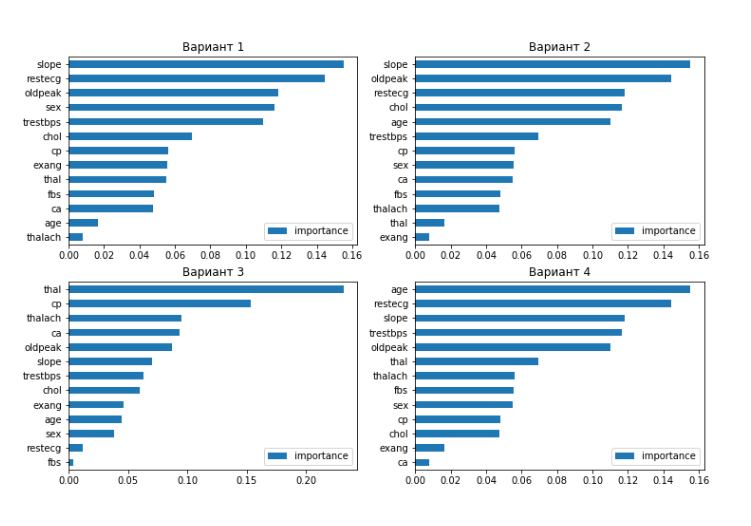

In [168]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [169]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [170]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

<Axes: >

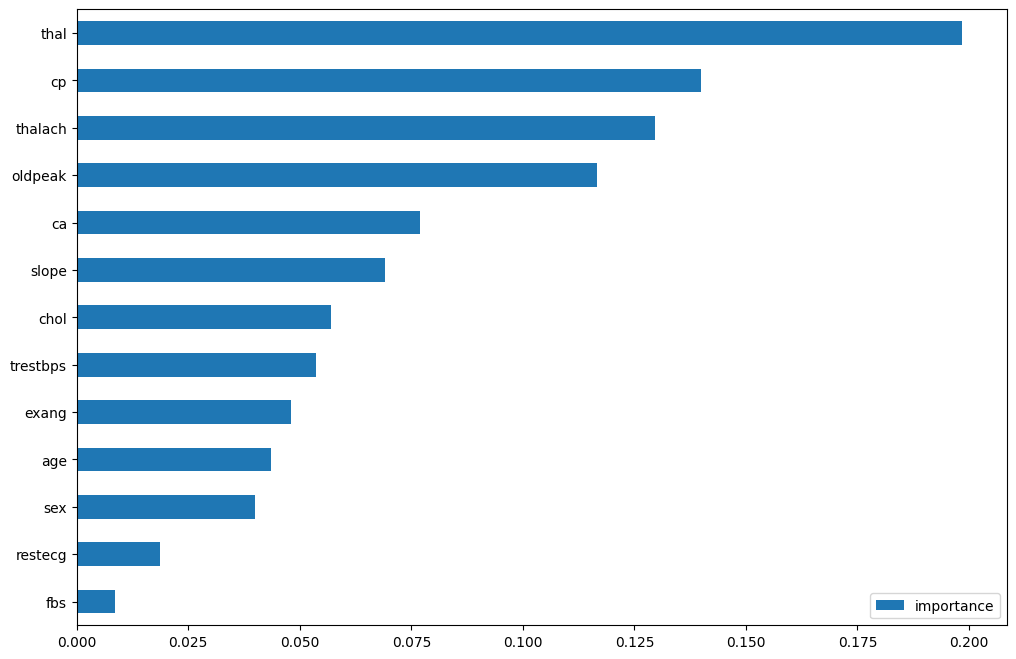

In [171]:
# отрисовка графика важност фичей
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

ответ: вариант 3

_____
Задание

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных о съедобности грибов.

Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)


Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [172]:
mushroom_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
mushroom_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [173]:
X_train = mushroom_data.drop('class', axis=1)
y_train = mushroom_data['class']

In [174]:
rf = RandomForestClassifier(random_state=0)
search = GridSearchCV(rf, param_grid={'n_estimators': range(10, 51, 10),
                                      'max_depth': range(1, 13, 2), 
                            'min_samples_split': range(2, 10, 2), 
                            'min_samples_leaf': range(1, 8)},
                     cv=3, n_jobs=-1)
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [175]:
best_clf = search.best_estimator_

In [176]:
best_clf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

<Axes: >

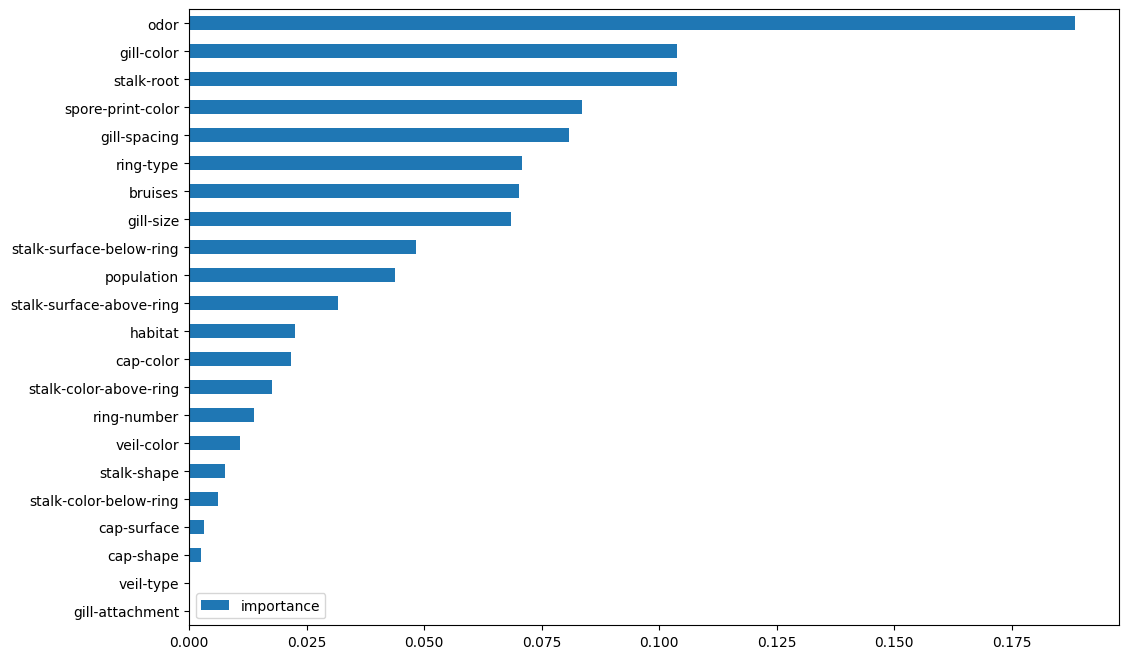

In [177]:
# отрисовка графика важност фичей
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих  грибов (https://stepik.org/media/attachments/course/4852/testing_mush.csv) и напишите в ответ число несъедобных грибов (класс равен 1).

In [178]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')


In [179]:
result = best_clf.predict(X_test)

In [180]:
result.sum()

976

In [181]:
pd.Series(result).value_counts()

0    1055
1     976
dtype: int64

Ответ: 976

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам. Выберите из предложенных вариантов правильный

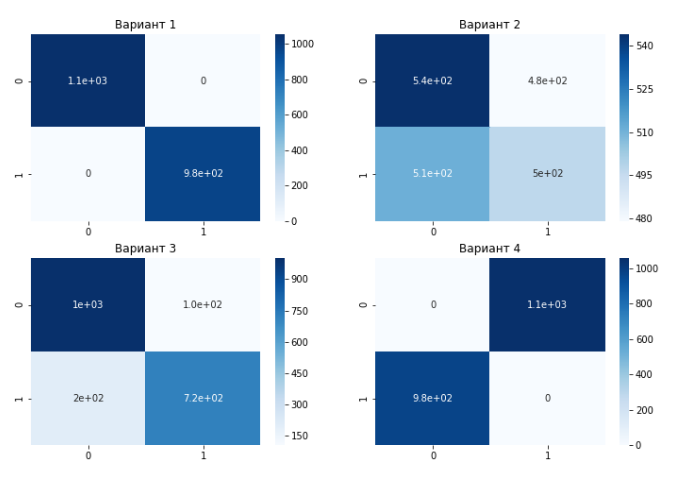

In [182]:
y_true = pd.read_csv(r'C:\Users\KDK\DS_education\Stepik\testing_mushrooms.csv')
y_true.head()

,class
0,0
1,0
2,1
3,1
4,1


In [183]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, result)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<Axes: >

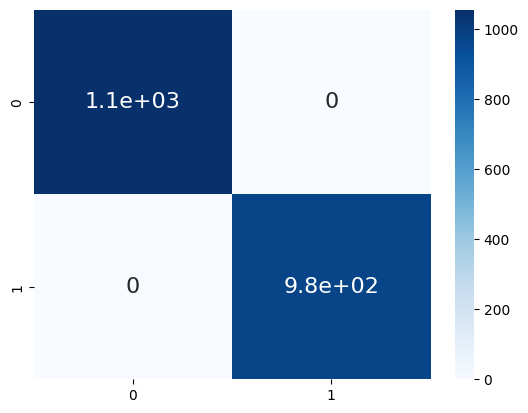

In [184]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, result), annot=True, annot_kws={"size": 16}, cmap="Blues")

Ответ: вариант 1

_____________
На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

In [185]:
ships_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
ships_train.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [186]:
X_ships_train = ships_train.drop('class', axis=1)
y_ships_train = ships_train['class']

In [187]:
ships_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
ships_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [188]:
rf = RandomForestClassifier(random_state=0)
search = GridSearchCV(rf, param_grid={'n_estimators': range(10, 51, 10),
                                      'max_depth': range(1, 13, 2), 
                            'min_samples_split': range(2, 10, 2), 
                            'min_samples_leaf': range(1, 8)},
                     cv=3, n_jobs=-1)
search.fit(X_ships_train, y_ships_train)
search.best_params_
best_clf = search.best_estimator_
res = pd.Series(best_clf.predict(ships_test))

In [189]:
res.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

Какая переменная оказалась самой важной для классифицирования кораблей?

<Axes: >

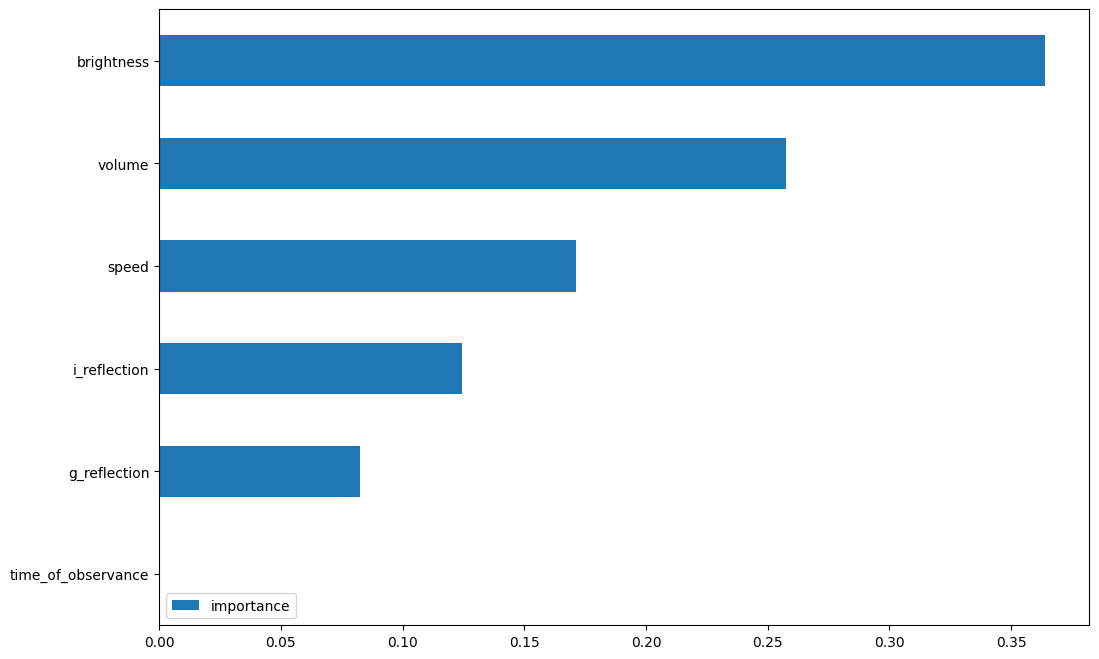

In [190]:
best_clf.feature_importances_
# отрисовка графика важност фичей
imp = pd.DataFrame(best_clf.feature_importances_, index=X_ships_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

<Axes: >

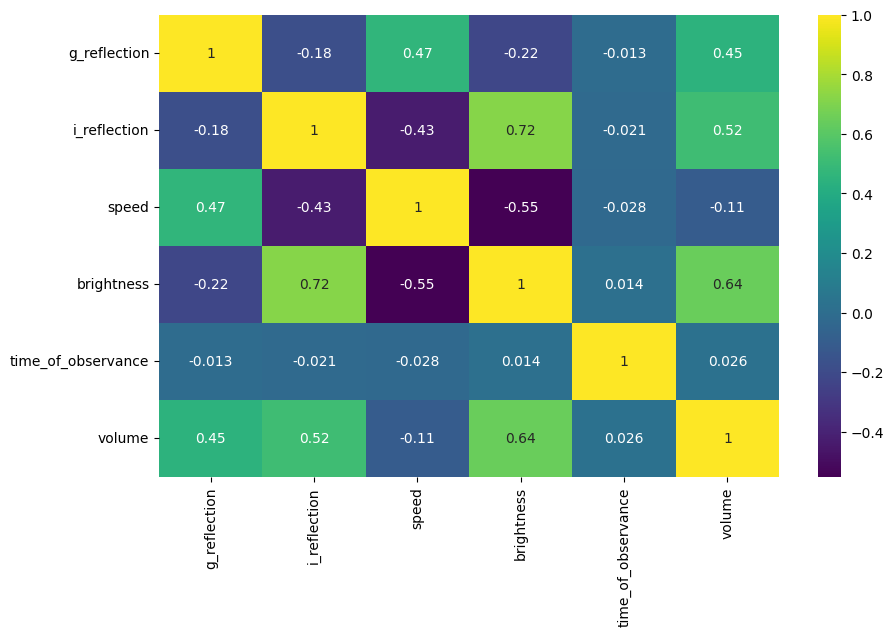

In [191]:
corr_m = X_ships_train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_m, annot=True, cmap='viridis')

In [192]:
# Видим большую корреляцию brightness с остальными параметрами. 
# Выкинем этот показатель и переобучим модель

X_ships_train = ships_train.drop(['class', 'brightness'], axis=1)
rf = RandomForestClassifier(random_state=0)
search = GridSearchCV(rf, param_grid={'n_estimators': range(10, 51, 10),
                                      'max_depth': range(1, 13, 2), 
                            'min_samples_split': range(2, 10, 2), 
                            'min_samples_leaf': range(1, 8)},
                     cv=3, n_jobs=-1)
search.fit(X_ships_train, y_ships_train)
search.best_params_
best_clf = search.best_estimator_


In [193]:
res = pd.Series(best_clf.predict(ships_test.drop('brightness', axis=1)))
res.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

<Axes: >

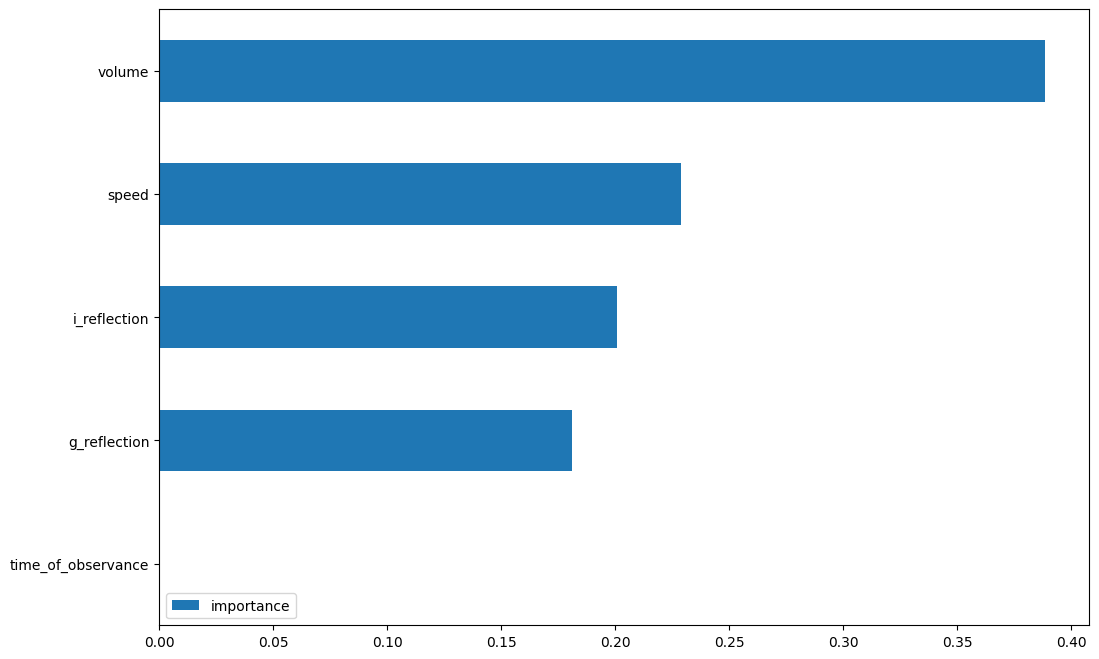

In [194]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_ships_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Ответ: главный признак - Volume

________________
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

варианты:
1. Наличие планемо увеличивает опасность - возможно жукеры строят свои базы на этих телах

2. Присутствие жукеров в системе - очевидный сигнал об опасности

3. Близость к чёрной дыре сильно связана с опасностью - может быть инопланетяне как-то используют их (или находиться рядом с чёрной дырой не лучшая идея)

In [196]:
danger_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
danger_data

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


<Axes: >

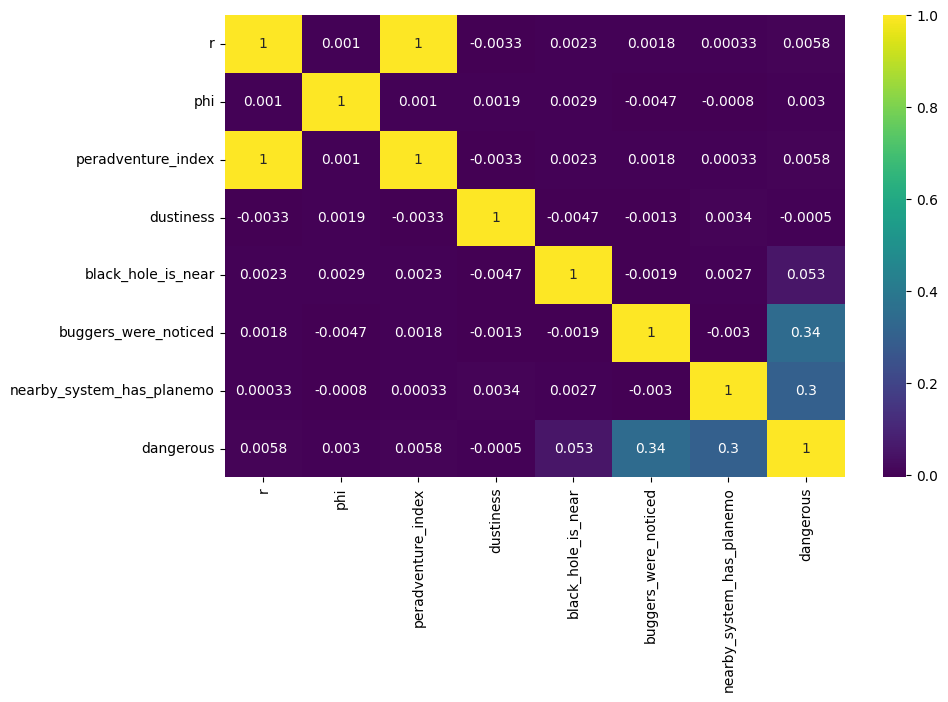

In [197]:
corr_m = danger_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_m, annot=True, cmap='viridis')

In [199]:
# уберем из данных peradventure_index, т.к. он полдностью коррелирует с r
X_danger_train = danger_data.drop(['peradventure_index', 'dangerous'], axis=1)
y_danger_train = danger_data['dangerous']

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=0)
search = RandomizedSearchCV(rf, param_distributions={'n_estimators': range(10, 51, 10),
                                      'max_depth': range(1, 13, 2), 
                            'min_samples_split': range(2, 10, 2), 
                            'min_samples_leaf': range(1, 8)},
                     cv=3, n_jobs=-1)
search.fit(X_danger_train, y_danger_train)
search.best_params_
best_clf = search.best_estimator_

<Axes: >

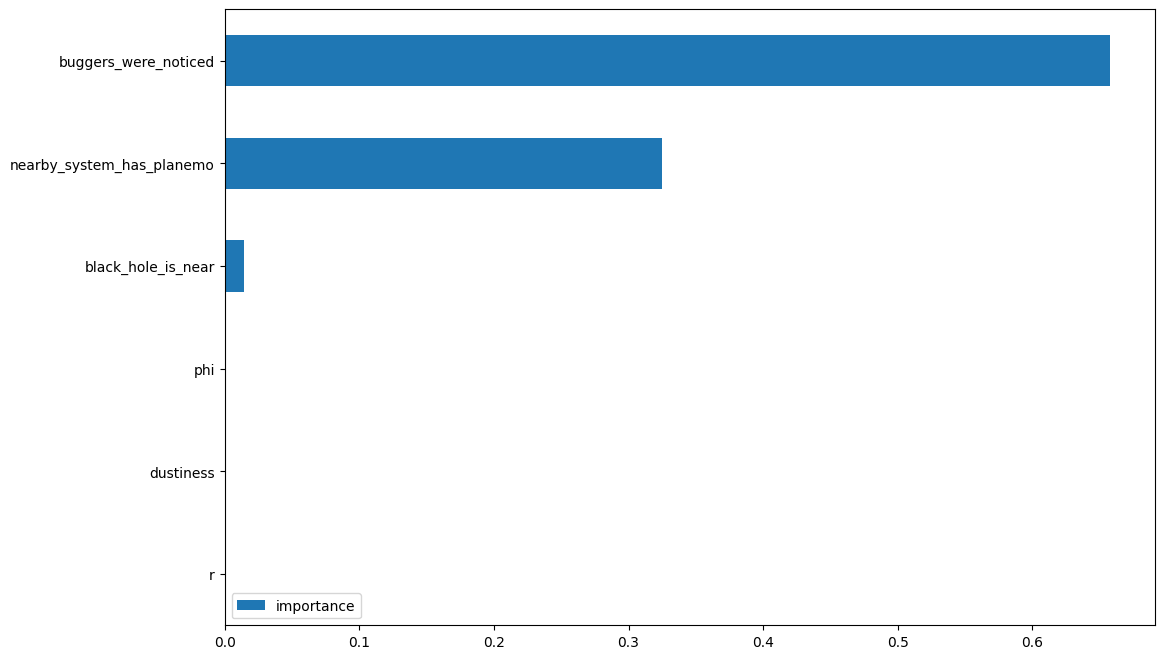

In [201]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_danger_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

____
Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.

1) df.mean(axis=0)


2) df.apply('mean')


3) df.apply(np.mean)


4) df.describe().loc['mean']

Пример датасэта для тестирования - https://stepik.org/media/attachments/course/4852/iris.csv

При использовании jupyter notebook можно оттестировать скорость выполнения кода при помощи "магии" timeit, которая проведёт несколько прогонов кода и выдаст среднее значение

%%timeit
your_command
Если вы пользуетесь чем-то другим, воспользуйтесь библиотекой time

from time import time
before = time()
your_command
after = time()

print(after - before)

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [206]:
%%timeit
df.mean(axis=0)

477 µs ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [203]:
%%timeit
df.apply('mean')

600 µs ± 59.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [204]:
%%timeit
df.apply(np.mean)

1.02 ms ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [205]:
%%timeit
df.describe().loc['mean']

12.3 ms ± 561 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
